## 多项式回归模型
根据上面的线性回归模型

$$
\hat{y} = w x + b
$$

这是关于 x 的一个一次多项式，这个模型比较简单，没有办法拟合比较复杂的模型，所以我们可以使用更高次的模型，比如

$$
\hat{y} = w_0 + w_1 x + w_2 x^2 + w_3 x^3 + \cdots
$$

这样就能够拟合更加复杂的模型，这就是多项式模型，这里使用了 x 的更高次，同理还有多元回归模型，形式也是一样的，只是出了使用 x，还是更多的变量，比如 y、z 等等，同时他们的 loss 函数和简单的线性回归模型是一致的。

In [47]:
import torch as t
import numpy as np
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline
t.manual_seed(2017)

In [48]:
# 定义一个多变量函数

#定义参数
w_target = np.array([0.5,3,2.4])
b_target = np.array([0.9])

#打印出函数式子
f_des = 'y = {:.2f} + {:.2f} * x + {:.2f} * x^2 + {:.2f} * x^3'.format(
        b_target[0],w_target[0],w_target[1],w_target[2])

print(f_des)

y = 0.90 + 0.50 * x + 3.00 * x^2 + 2.40 * x^3


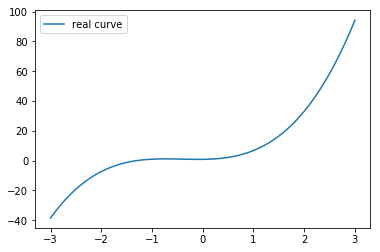

In [49]:
#画出函数曲线
x_sample = np.arange(-3,3.1,0.1)
y_sample = b_target[0] + w_target[0] * x_sample + w_target[1] * x_sample ** 2 + w_target[2] * x_sample ** 3

plt.plot(x_sample,y_sample,label='real curve')
plt.legend()

In [50]:
# 构建数据 x 和 y
# x 是一个如下矩阵 [x, x^2, x^3]
# y 是函数的结果 [y]

x_train = np.stack([x_sample ** i for i in range(1, 4)], axis=1)
x_train = t.from_numpy(x_train).float() # 转换成 float tensor

y_train = t.from_numpy(y_sample).float().unsqueeze(1) # 转化成 float tensor 

In [51]:
#定义参数和模型
w = Variable(t.randn(3,1),requires_grad=True)
b = Variable(t.zeros(1),requires_grad=True)

#将x和y转换成Variable
x_train = Variable(x_train)
y_train = Variable(y_train)

def multi_linear(x):
    return t.mm(x,w) + b 

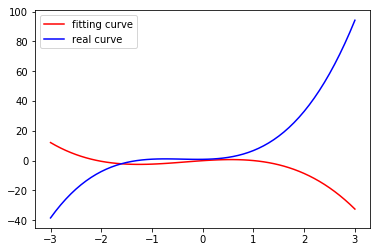

In [52]:
#绘制更新之前的线
y_pred = multi_linear(x_train)

plt.plot(x_train.data.numpy()[:,0],y_pred.data.numpy(),label='fitting curve',color='r')
plt.plot(x_train.data.numpy()[:,0],y_train.data.numpy(),label='real curve',color='b')
plt.legend()

In [53]:
#计算Loss
def get_loss(y_,y):
    return t.mean((y_ - y) ** 2)

loss = get_loss(y_pred,y_train)
print(loss)

Variable containing:
 1504.0251
[torch.FloatTensor of size 1]



In [54]:
#自动求导
loss.backward()

#查看下w和b的参数
print(w.grad)
print(b.grad)

Variable containing:
-109.3150
-148.3612
-737.2706
[torch.FloatTensor of size 3x1]

Variable containing:
-27.3972
[torch.FloatTensor of size 1]



In [55]:
#更新参数
w.data = w.data - 1e-2 * w.grad.data
b.data = b.data - 1e-2 * b.grad.data

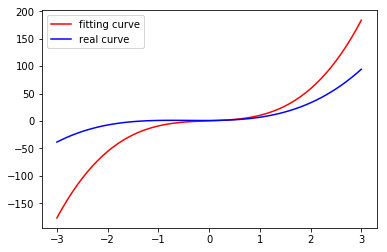

In [56]:
# 画出更新一次之后的模型
y_pred = multi_linear(x_train)

plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label='fitting curve', color='r')
plt.plot(x_train.data.numpy()[:, 0], y_sample, label='real curve', color='b')
plt.legend()

In [57]:
#更新100次
for e in range(1000):
    y_pred = multi_linear(x_train)
    loss = get_loss(y_pred,y_train)
    
    w.grad.data.zero_()
    b.grad.data.zero_()
    loss.backward()
    
    #更新参数
    w.data = w.data - 0.001 * w.grad.data
    b.data = b.data - 0.001 * b.grad.data
    if (e+1) % 20 == 0 :
        print('epoch{},loss{:.5f}'.format(e+1 , loss.data[0]))

epoch20,loss35.48256
epoch40,loss9.98445
epoch60,loss3.98747
epoch80,loss2.52495
epoch100,loss2.12305
epoch120,loss1.97100
epoch140,loss1.87946
epoch160,loss1.80418
epoch180,loss1.73473
epoch200,loss1.66863
epoch220,loss1.60519
epoch240,loss1.54421
epoch260,loss1.48555
epoch280,loss1.42912
epoch300,loss1.37483
epoch320,loss1.32260
epoch340,loss1.27236
epoch360,loss1.22403
epoch380,loss1.17753
epoch400,loss1.13281
epoch420,loss1.08978
epoch440,loss1.04838
epoch460,loss1.00856
epoch480,loss0.97025
epoch500,loss0.93339
epoch520,loss0.89794
epoch540,loss0.86383
epoch560,loss0.83101
epoch580,loss0.79945
epoch600,loss0.76908
epoch620,loss0.73987
epoch640,loss0.71176
epoch660,loss0.68473
epoch680,loss0.65872
epoch700,loss0.63370
epoch720,loss0.60963
epoch740,loss0.58647
epoch760,loss0.56419
epoch780,loss0.54276
epoch800,loss0.52215
epoch820,loss0.50231
epoch840,loss0.48323
epoch860,loss0.46488
epoch880,loss0.44722
epoch900,loss0.43023
epoch920,loss0.41389
epoch940,loss0.39817
epoch960,loss0.3

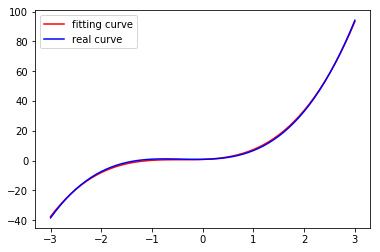

In [58]:
# 画出更新之后的结果
y_pred = multi_linear(x_train)

plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label='fitting curve', color='r')
plt.plot(x_train.data.numpy()[:, 0], y_sample, label='real curve', color='b')
plt.legend()